<a href="https://colab.research.google.com/github/kcarroth-dev/KarltonCarrothers_ML/blob/main/ECGR4105_Hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torchvision
import torchvision.transforms as transforms
import time

In [108]:
# Import csv data from my GitHub repo
cancer_url = 'https://raw.githubusercontent.com/kcarroth-dev/KarltonCarrothers_ML/main/cancer.csv'
diabetes_url = 'https://raw.githubusercontent.com/kcarroth-dev/KarltonCarrothers_ML/main/diabetes.csv'

In [109]:
# Create dataframes for each url
dfd = pd.read_csv(diabetes_url)
dfc = pd.read_csv(cancer_url)

#Check to see Pandas dataframes are working
dfc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [110]:
# Extract the input and output values
x1 = dfd.iloc[:, :8].values
y1 = dfd.iloc[:, 8].values

# Training vs Data sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.8, test_size = 0.2, random_state = 0)

# Standardize Data
sc_x1 = StandardScaler()
x1_train = sc_x1.fit_transform(x1_train)
x1_test = sc_x1.transform(x1_test)

In [111]:
# Extract the input and output values
x1 = dfd.iloc[:, :8].values
y1 = dfd.iloc[:, 8].values

# Training vs Data sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.8, test_size = 0.2, random_state = 0)

# Standardize Data
sc_x1 = StandardScaler()
x1_train = sc_x1.fit_transform(x1_train)
x1_test = sc_x1.transform(x1_test)

In [112]:
# Replacing the Benign and Malignant diagnoses with numbers
dfc['diagnosis'].replace('B', 0, inplace=True)
dfc['diagnosis'].replace('M', 1, inplace=True)

# Extract the input and output values
x2 = dfc.iloc[:, 2:].values
y2 = dfc.iloc[:, 1].values

# Split the data into training and validation sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.8, test_size = 0.2, random_state = 0)

# Scale the data using standardization
sc_x = StandardScaler()
x2_train = sc_x.fit_transform(x2_train)
x2_test = sc_x.transform(x2_test)

print(x2)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


/tmp/ipython-input-2218063702.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfc['diagnosis'].replace('B', 0, inplace=True)
/tmp/ipython-input-2218063702.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [113]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(x1_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y1_train, dtype=torch.float32).unsqueeze(1) # unsqueeze for BCEWithLogitsLoss
X_test_tensor = torch.tensor(x1_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y1_test, dtype=torch.float32).unsqueeze(1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the Neural Network
class DiabetesNN(nn.Module):
    def __init__(self, input_size):
        super(DiabetesNN, self).__init__()
        self.layer_1 = nn.Linear(input_size, 128)
        self.relu_1 = nn.ReLU()
        self.layer_2 = nn.Linear(128, 64)
        self.relu_2 = nn.ReLU()
        self.layer_3 = nn.Linear(64, 64)
        self.relu_3 = nn.ReLU()
        self.output_layer = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu_1(self.layer_1(x))
        x = self.relu_2(self.layer_2(x))
        x = self.relu_3(self.layer_3(x))
        x = self.output_layer(x) # No sigmoid here, as BCEWithLogitsLoss will apply it
        return x

# Instantiate the model
input_size = X_train_tensor.shape[1] # Number of features
model = DiabetesNN(input_size)

# Define Loss and Optimizer
criterion = nn.BCEWithLogitsLoss() # Combines Sigmoid and BCELoss for numerical stability
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training the model
num_epochs = 5000
loss_history = [] # Initialize loss_history

for epoch in range(num_epochs):
    model.train() # Set model to training mode
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    loss_history.append(loss.item()) # Append loss to history

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval() # Set model to evaluation mode
with torch.no_grad(): # Disable gradient calculation during evaluation
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (torch.sigmoid(outputs) > 0.5).float() # Apply sigmoid and threshold for binary prediction
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the neural network on the test data: {accuracy:.2f}%')

Epoch [100/5000], Loss: 0.6145
Epoch [200/5000], Loss: 0.4450
Epoch [300/5000], Loss: 0.5564
Epoch [400/5000], Loss: 0.2045
Epoch [500/5000], Loss: 0.0845
Epoch [600/5000], Loss: 0.0081
Epoch [700/5000], Loss: 0.0029
Epoch [800/5000], Loss: 0.0059
Epoch [900/5000], Loss: 0.0044
Epoch [1000/5000], Loss: 0.0001
Epoch [1100/5000], Loss: 0.0003
Epoch [1200/5000], Loss: 0.0000
Epoch [1300/5000], Loss: 0.0000
Epoch [1400/5000], Loss: 0.0000
Epoch [1500/5000], Loss: 0.0000
Epoch [1600/5000], Loss: 0.0000
Epoch [1700/5000], Loss: 0.0000
Epoch [1800/5000], Loss: 0.0000
Epoch [1900/5000], Loss: 0.0000
Epoch [2000/5000], Loss: 0.0000
Epoch [2100/5000], Loss: 0.0000
Epoch [2200/5000], Loss: 0.0000
Epoch [2300/5000], Loss: 0.0000
Epoch [2400/5000], Loss: 0.0000
Epoch [2500/5000], Loss: 0.0000
Epoch [2600/5000], Loss: 0.0000
Epoch [2700/5000], Loss: 0.0000
Epoch [2800/5000], Loss: 0.0000
Epoch [2900/5000], Loss: 0.0000
Epoch [3000/5000], Loss: 0.0000
Epoch [3100/5000], Loss: 0.0000
Epoch [3200/5000]

In [115]:
# Set model to evaluation mode (already done in previous cell, but good practice to reiterate)
model.eval()

y_true_nn = []
y_pred_nn = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (torch.sigmoid(outputs) > 0.5).float()

        y_true_nn.extend(labels.cpu().numpy())
        y_pred_nn.extend(predicted.cpu().numpy())

# Convert lists to NumPy arrays
y_true_nn = np.array(y_true_nn)
y_pred_nn = np.array(y_pred_nn)

# Calculate metrics
accuracy = accuracy_score(y_true_nn, y_pred_nn)
precision = precision_score(y_true_nn, y_pred_nn)
recall = recall_score(y_true_nn, y_pred_nn)
f1 = f1_score(y_true_nn, y_pred_nn)

# Print the results
print(f'Neural Network Metrics on Test Data:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Neural Network Metrics on Test Data:
Accuracy: 0.7338
Precision: 0.5556
Recall: 0.6383
F1 Score: 0.5941


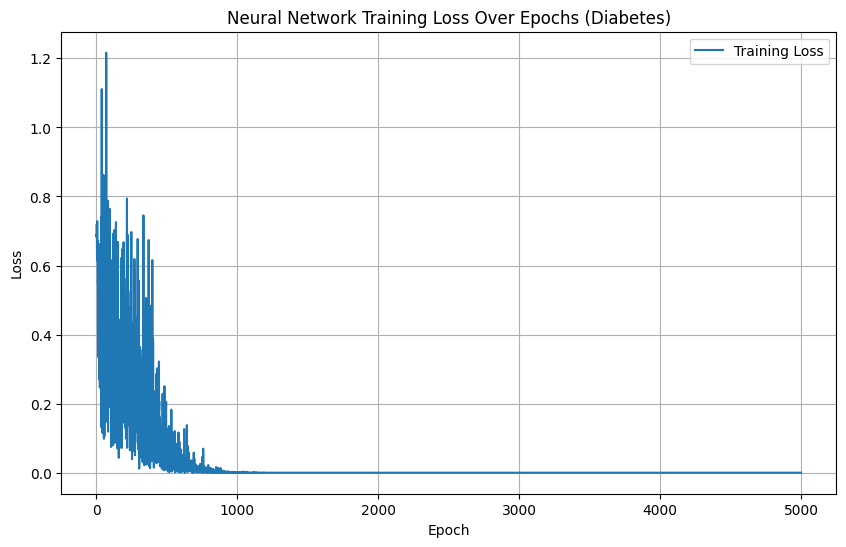

In [116]:
import matplotlib.pyplot as plt

# Plotting the loss history
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Neural Network Training Loss Over Epochs (Diabetes)')
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
The previous step calculated and displayed the performance metrics for the Neural Network. Now, I need to generate and plot the confusion matrix for the trained PyTorch Neural Network using the test data to visually assess its performance.



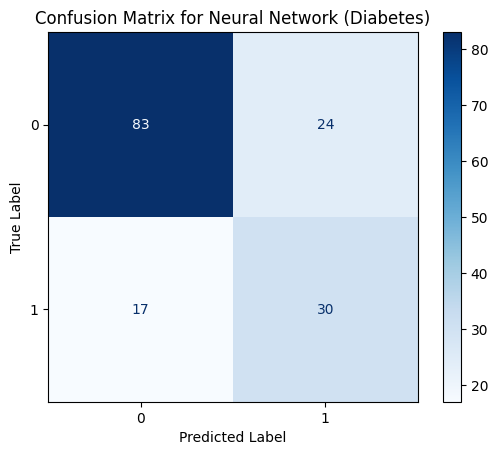

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_true_nn, y_pred_nn)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Neural Network (Diabetes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [119]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=0)
log_reg_model.fit(x1_train, y1_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(x1_test)

print("Logistic Regression model trained and predictions made.")

Logistic Regression model trained and predictions made.


In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for Logistic Regression
accuracy_log_reg = accuracy_score(y1_test, y_pred_log_reg)
precision_log_reg = precision_score(y1_test, y_pred_log_reg)
recall_log_reg = recall_score(y1_test, y_pred_log_reg)
f1_log_reg = f1_score(y1_test, y_pred_log_reg)

# Print the results
print(f'Logistic Regression Metrics on Test Data:')
print(f'Accuracy: {accuracy_log_reg:.4f}')
print(f'Precision: {precision_log_reg:.4f}')
print(f'Recall: {recall_log_reg:.4f}')
print(f'F1 Score: {f1_log_reg:.4f}')

Logistic Regression Metrics on Test Data:
Accuracy: 0.8247
Precision: 0.7632
Recall: 0.6170
F1 Score: 0.6824


**Reasoning**:
Following the task, the next step is to train a Support Vector Machine (SVM) model on the `diabetes.csv` dataset's training data. This requires importing `SVC` from `sklearn.svm`.



In [121]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=0) # Using a linear kernel for simplicity
svm_model.fit(x1_train, y1_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(x1_test)

print("Support Vector Machine (SVM) model trained and predictions made.")

Support Vector Machine (SVM) model trained and predictions made.


In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for SVM
accuracy_svm = accuracy_score(y1_test, y_pred_svm)
precision_svm = precision_score(y1_test, y_pred_svm)
recall_svm = recall_score(y1_test, y_pred_svm)
f1_svm = f1_score(y1_test, y_pred_svm)

# Print the results
print(f'Support Vector Machine (SVM) Metrics on Test Data:')
print(f'Accuracy: {accuracy_svm:.4f}')
print(f'Precision: {precision_svm:.4f}')
print(f'Recall: {recall_svm:.4f}')
print(f'F1 Score: {f1_svm:.4f}')

Support Vector Machine (SVM) Metrics on Test Data:
Accuracy: 0.8247
Precision: 0.7632
Recall: 0.6170
F1 Score: 0.6824


Performance Metrics Comparison:
              Model  Accuracy  Precision   Recall  F1 Score
     Neural Network  0.733766   0.555556 0.638298  0.594059
Logistic Regression  0.824675   0.763158 0.617021  0.682353
                SVM  0.824675   0.763158 0.617021  0.682353


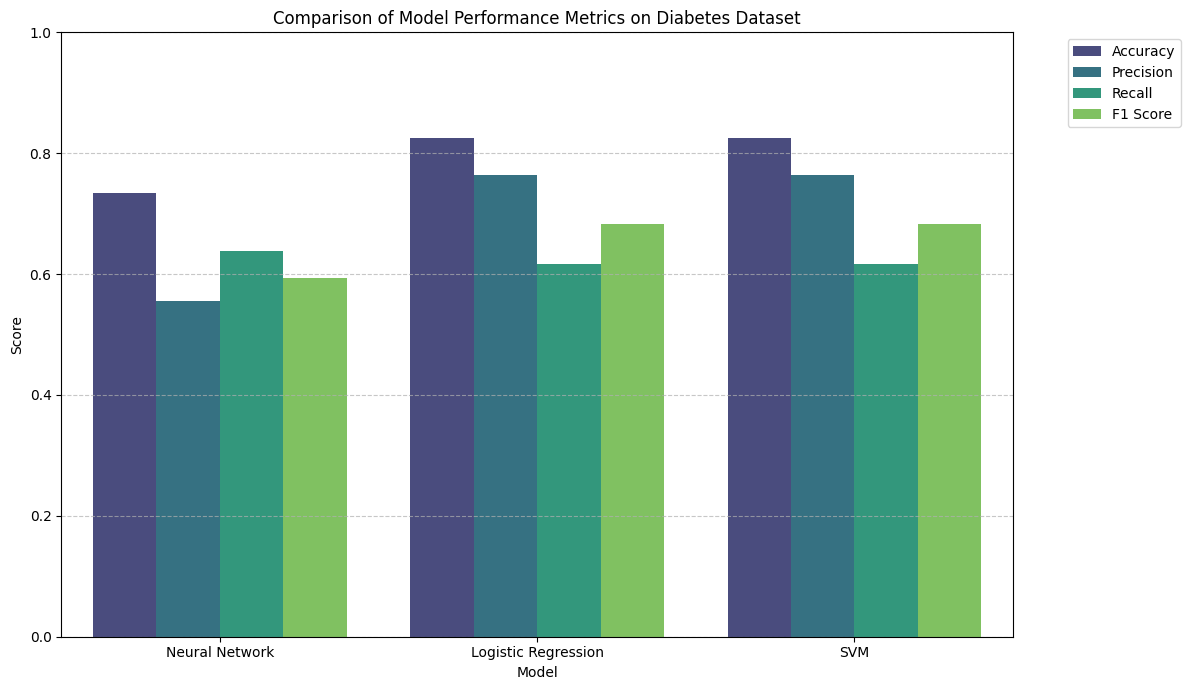

In [124]:
# Gather all the metrics
metrics_data = {
    'Model': ['Neural Network', 'Logistic Regression', 'SVM'],
    'Accuracy': [accuracy, accuracy_log_reg, accuracy_svm],
    'Precision': [precision, precision_log_reg, precision_svm],
    'Recall': [recall, recall_log_reg, recall_svm],
    'F1 Score': [f1, f1_log_reg, f1_svm]
}

metrics_df = pd.DataFrame(metrics_data)

# Display the metrics table
print("Performance Metrics Comparison:")
print(metrics_df.to_string(index=False))

# Plotting the metrics
metrics_df_melted = metrics_df.melt('Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df_melted, palette='viridis')
plt.title('Comparison of Model Performance Metrics on Diabetes Dataset')
plt.ylabel('Score')
plt.ylim(0, 1) # Metrics are between 0 and 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [125]:
# Convert data to PyTorch tensors
X_train_tensor2 = torch.tensor(x2_train, dtype=torch.float32)
y_train_tensor2 = torch.tensor(y2_train, dtype=torch.float32).unsqueeze(1) # unsqueeze for BCEWithLogitsLoss
X_test_tensor2 = torch.tensor(x2_test, dtype=torch.float32)
y_test_tensor2 = torch.tensor(y2_test, dtype=torch.float32).unsqueeze(1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor2, y_train_tensor2)
test_dataset = TensorDataset(X_test_tensor2, y_test_tensor2)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the Neural Network
class CancerNN(nn.Module):
    def __init__(self, input_size):
        super(CancerNN, self).__init__()
        self.layer_1 = nn.Linear(input_size, 128)
        self.relu_1 = nn.ReLU()
        self.layer_2 = nn.Linear(128, 64)
        self.relu_2 = nn.ReLU()
        self.layer_3 = nn.Linear(64, 64)
        self.relu_3 = nn.ReLU()
        self.output_layer = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu_1(self.layer_1(x))
        x = self.relu_2(self.layer_2(x))
        x = self.relu_3(self.layer_3(x))
        x = self.output_layer(x) # No sigmoid here, as BCEWithLogitsLoss will apply it
        return x

# Instantiate the model
input_size = X_train_tensor2.shape[1] # Number of features
model2 = CancerNN(input_size)

# Define Loss and Optimizer
criterion = nn.BCEWithLogitsLoss() # Combines Sigmoid and BCELoss for numerical stability
optimizer = optim.Adam(model2.parameters(), lr=0.001)

# Training the model
num_epochs = 5000
cancer_loss_history = [] # Initialize loss history for CancerNN

for epoch in range(num_epochs):
    model2.train() # Set model to training mode
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    cancer_loss_history.append(loss.item()) # Append loss to history

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model2.eval() # Set model to evaluation mode
with torch.no_grad(): # Disable gradient calculation during evaluation
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model2(inputs)
        predicted = (torch.sigmoid(outputs) > 0.5).float() # Apply sigmoid and threshold for binary prediction
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy2 = 100 * correct / total
    print(f'Accuracy of the neural network on the test data: {accuracy2:.2f}%')

Epoch [100/5000], Loss: 0.0001
Epoch [200/5000], Loss: 0.0000
Epoch [300/5000], Loss: 0.0000
Epoch [400/5000], Loss: 0.0000
Epoch [500/5000], Loss: 0.0000
Epoch [600/5000], Loss: 0.0000
Epoch [700/5000], Loss: 0.0000
Epoch [800/5000], Loss: 0.0000
Epoch [900/5000], Loss: 0.0000
Epoch [1000/5000], Loss: 0.0000
Epoch [1100/5000], Loss: 0.0000
Epoch [1200/5000], Loss: 0.0000
Epoch [1300/5000], Loss: 0.0000
Epoch [1400/5000], Loss: 0.0000
Epoch [1500/5000], Loss: 0.0000
Epoch [1600/5000], Loss: 0.0000
Epoch [1700/5000], Loss: 0.0000
Epoch [1800/5000], Loss: 0.0000
Epoch [1900/5000], Loss: 0.0000
Epoch [2000/5000], Loss: 0.0000
Epoch [2100/5000], Loss: 0.0000
Epoch [2200/5000], Loss: 0.0000
Epoch [2300/5000], Loss: 0.0000
Epoch [2400/5000], Loss: 0.0000
Epoch [2500/5000], Loss: 0.0000
Epoch [2600/5000], Loss: 0.0000
Epoch [2700/5000], Loss: 0.0000
Epoch [2800/5000], Loss: 0.0000
Epoch [2900/5000], Loss: 0.0000
Epoch [3000/5000], Loss: 0.0000
Epoch [3100/5000], Loss: 0.0000
Epoch [3200/5000]

In [132]:
# Set model to evaluation mode (already done in previous cell, but good practice to reiterate)
model.eval()

y_true_nn2 = []
y_pred_nn2 = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model2(inputs)
        predicted = (torch.sigmoid(outputs) > 0.5).float()

        y_true_nn2.extend(labels.cpu().numpy())
        y_pred_nn2.extend(predicted.cpu().numpy())

# Convert lists to NumPy arrays
y_true_nn2 = np.array(y_true_nn2)
y_pred_nn2 = np.array(y_pred_nn2)

# Calculate metrics
accuracy2 = accuracy_score(y_true_nn2, y_pred_nn2)
precision2 = precision_score(y_true_nn2, y_pred_nn2)
recall2 = recall_score(y_true_nn2, y_pred_nn2)
f12 = f1_score(y_true_nn2, y_pred_nn2)

# Print the results
print(f'Neural Network Metrics on Test Data:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Neural Network Metrics on Test Data:
Accuracy: 0.9561
Precision: 0.9200
Recall: 0.9787
F1 Score: 0.9485


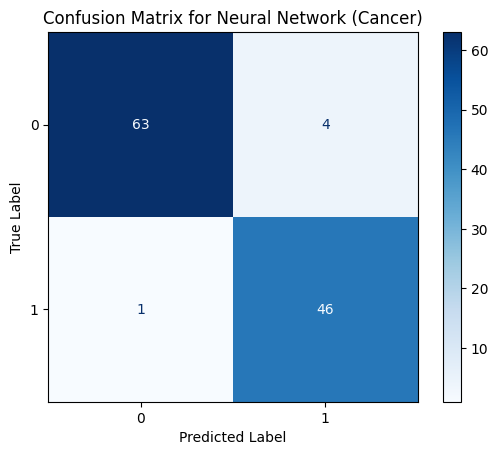

In [133]:
# Generate the confusion matrix
cm = confusion_matrix(y_true_nn2, y_pred_nn2)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Neural Network (Cancer)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [134]:
# Initialize and train the Logistic Regression model
log_reg_model2 = LogisticRegression(random_state=0)
log_reg_model2.fit(x2_train, y2_train)

# Make predictions on the test set
y_pred_log_reg2 = log_reg_model2.predict(x2_test)

print("Logistic Regression model trained and predictions made.")

Logistic Regression model trained and predictions made.


In [135]:
# Calculate metrics for Logistic Regression
accuracy_log_reg2 = accuracy_score(y2_test, y_pred_log_reg2)
precision_log_reg2 = precision_score(y2_test, y_pred_log_reg2)
recall_log_reg2 = recall_score(y2_test, y_pred_log_reg2)
f1_log_reg2 = f1_score(y2_test, y_pred_log_reg2)

# Print the results
print(f'Logistic Regression Metrics on Test Data:')
print(f'Accuracy: {accuracy_log_reg2:.4f}')
print(f'Precision: {precision_log_reg2:.4f}')
print(f'Recall: {recall_log_reg2:.4f}')
print(f'F1 Score: {f1_log_reg2:.4f}')

Logistic Regression Metrics on Test Data:
Accuracy: 0.9649
Precision: 0.9574
Recall: 0.9574
F1 Score: 0.9574


In [136]:
# Initialize and train the SVM model
svm_model2 = SVC(kernel='linear', random_state=0) # Using a linear kernel for simplicity
svm_model2.fit(x2_train, y2_train)

# Make predictions on the test set
y_pred_svm2 = svm_model2.predict(x2_test)

print("Support Vector Machine (SVM) model trained and predictions made.")

Support Vector Machine (SVM) model trained and predictions made.


In [137]:
# Calculate metrics for SVM
accuracy_svm2 = accuracy_score(y2_test, y_pred_svm2)
precision_svm2 = precision_score(y2_test, y_pred_svm2)
recall_svm2 = recall_score(y2_test, y_pred_svm2)
f1_svm2 = f1_score(y2_test, y_pred_svm2)

# Print the results
print(f'Support Vector Machine (SVM) Metrics on Test Data:')
print(f'Accuracy: {accuracy_svm2:.4f}')
print(f'Precision: {precision_svm2:.4f}')
print(f'Recall: {recall_svm2:.4f}')
print(f'F1 Score: {f1_svm2:.4f}')

Support Vector Machine (SVM) Metrics on Test Data:
Accuracy: 0.9825
Precision: 0.9787
Recall: 0.9787
F1 Score: 0.9787


Performance Metrics Comparison:
              Model  Accuracy  Precision   Recall  F1 Score
     Neural Network  0.956140   0.920000 0.978723  0.948454
Logistic Regression  0.964912   0.957447 0.957447  0.957447
                SVM  0.982456   0.978723 0.978723  0.978723


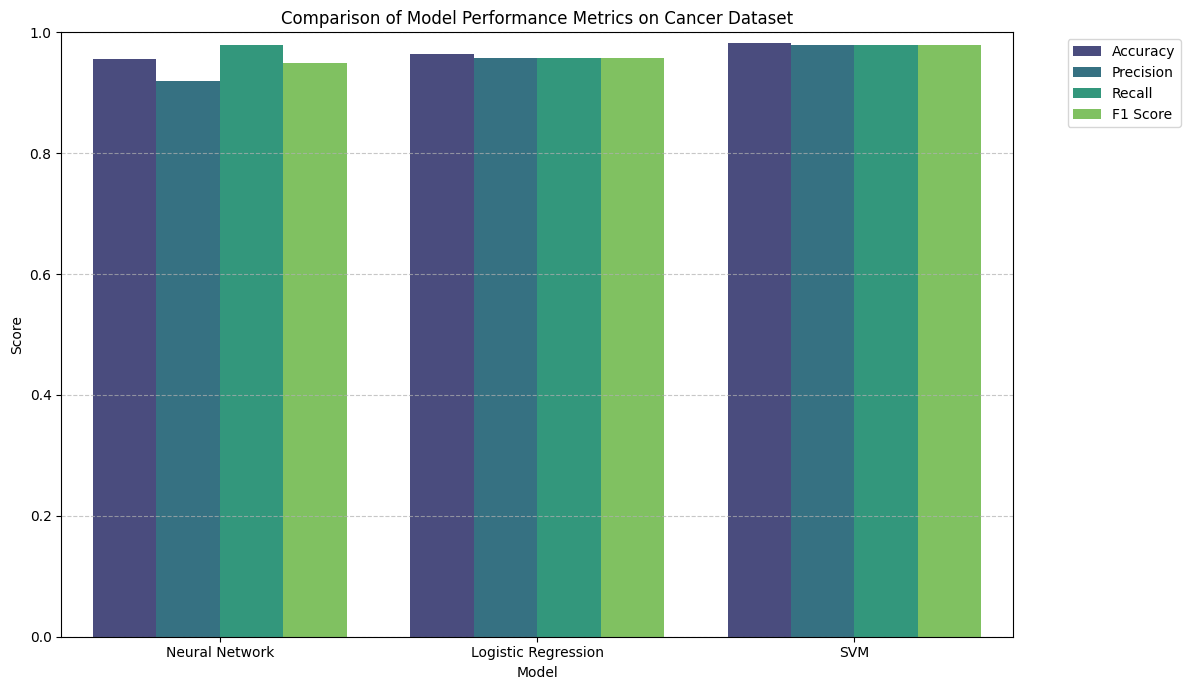

In [139]:
# Gather all the metrics
metrics_data2 = {
    'Model': ['Neural Network', 'Logistic Regression', 'SVM'],
    'Accuracy': [accuracy2, accuracy_log_reg2, accuracy_svm2],
    'Precision': [precision2, precision_log_reg2, precision_svm2],
    'Recall': [recall2, recall_log_reg2, recall_svm2],
    'F1 Score': [f12, f1_log_reg2, f1_svm2]
}

metrics_df2 = pd.DataFrame(metrics_data2)

# Display the metrics table
print("Performance Metrics Comparison:")
print(metrics_df2.to_string(index=False))

# Plotting the metrics
metrics_df_melted = metrics_df2.melt('Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df_melted, palette='viridis')
plt.title('Comparison of Model Performance Metrics on Cancer Dataset')
plt.ylabel('Score')
plt.ylim(0, 1) # Metrics are between 0 and 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [146]:
# Load CIFAR-10 dataset to calculate mean and std
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Calculate mean and std
imgs = torch.stack([img_t for img_t, _ in train_dataset], dim=3)
mean = imgs.view(3, -1).mean(dim=1)
std = imgs.view(3, -1).std(dim=1)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformation with calculated mean and std
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Load CIFAR-10 dataset with normalization
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the Neural Network
class CIFARNN(nn.Module):
    def __init__(self, input_size):
        super(CIFARNN, self).__init__()
        self.layer_1 = nn.Linear(input_size, 512)
        self.relu_1 = nn.ReLU()
        self.layer_2 = nn.Linear(512, 512)
        self.relu_2 = nn.ReLU()
        self.layer_3 = nn.Linear(512, 512)
        self.relu_3 = nn.ReLU()
        self.output_layer = nn.Linear(512, 10)

    def forward(self, x):
        x = self.relu_1(self.layer_1(x))
        x = self.relu_2(self.layer_2(x))
        x = self.relu_3(self.layer_3(x))
        x = self.output_layer(x) # No sigmoid here, as BCEWithLogitsLoss will apply it
        return x

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
num_epochs = 300
total_start_time = time.time()
for epoch in range(num_epochs):
    start_time = time.time()  # Record the start time for training duration
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate training time
    end_time = time.time()
    training_time = end_time - start_time

    # Print training statistics
    if epoch % 10 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Training Time: {training_time:.2f} seconds')

    # Print total training time
    total_end_time = time.time()
    total_training_time = total_end_time - total_start_time
    print(f'Total Training Time: {total_training_time:.2f} seconds')

    # Testing the model
    model.eval()
    correct = 0
    total = 0
    all_predicted = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_predicted.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total

    # Print evaluation accuracy
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

    # Set the model back to training mode
    model.train()

# Calculate and print F1 score at the end
f1 = f1_score(all_labels, all_predicted, average='weighted')
print(f'Final F1 Score: {f1:.4f}')

# Calculate and print confusion matrix at the end
cm = confusion_matrix(all_labels, all_predicted)
print('Final Confusion Matrix:')
print(cm)

# After training is complete, print final evaluation accuracy
print(f'Final Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/300, Loss: 1.6007895123623217, Training Time: 21.14 seconds
Total Training Time: 21.14 seconds
Test Accuracy: 43.62%
Total Training Time: 45.49 seconds
Test Accuracy: 43.84%
Total Training Time: 69.90 seconds
Test Accuracy: 43.72%
Total Training Time: 94.11 seconds
Test Accuracy: 44.02%
Total Training Time: 118.18 seconds
Test Accuracy: 44.31%
Total Training Time: 142.30 seconds
Test Accuracy: 44.15%
Total Training Time: 166.42 seconds
Test Accuracy: 44.17%
Total Training Time: 190.10 seconds
Test Accuracy: 44.28%
Total Training Time: 213.78 seconds
Test Accuracy: 44.20%
Total Training Time: 237.85 seconds
Test Accuracy: 44.63%
Epoch 11/300, Loss: 1.5491539483789898, Training Time: 20.20 seconds
Total Training Time: 261.96 seconds
Test Accuracy: 44.88%
Total Training Time: 286.07 seconds
Test Accuracy: 44.95%
Total Training Time: 310.15 seconds
Test Accuracy: 45.00%
Total Training Time: 334.19 seconds
Test Accuracy: 45.07%
Total Training Time: 358.14 seconds
Test Accuracy: 45.0

KeyboardInterrupt: 

In [147]:
# Calculate and print F1 score at the end
f1 = f1_score(all_labels, all_predicted, average='weighted')
print(f'Final F1 Score: {f1:.4f}')

# Calculate and print confusion matrix at the end
cm = confusion_matrix(all_labels, all_predicted)
print('Final Confusion Matrix:')
print(cm)

# After training is complete, print final evaluation accuracy
print(f'Final Test Accuracy: {accuracy * 100:.2f}%')

Final F1 Score: 0.4955
Final Confusion Matrix:
[[565  39  46  37  22  26  19  37 149  60]
 [ 32 618  21  23  22  29  28  34  70 123]
 [ 92  39 333  97 118  75 123  79  26  18]
 [ 21  36  86 300  73 182 154  58  41  49]
 [ 47  10 137  66 392  67 144  87  30  20]
 [ 23  25  78 174  79 386  86  73  45  31]
 [ 12  20  68 102  94  61 588  24  14  17]
 [ 38  32  58  64  75  73  40 543  19  58]
 [ 78  46  11  30  18  41   8  14 688  66]
 [ 43 161  13  24  16  23  31  45  64 580]]
Final Test Accuracy: 49.93%


In [ ]:
# Load CIFAR-10 dataset to calculate mean and std
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Calculate mean and std
imgs = torch.stack([img_t for img_t, _ in train_dataset], dim=3)
mean = imgs.view(3, -1).mean(dim=1)
std = imgs.view(3, -1).std(dim=1)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformation with calculated mean and std
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Load CIFAR-10 dataset with normalization
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the Neural Network
class CIFARNN(nn.Module):
    def __init__(self, input_size):
        super(CIFARNN, self).__init__()
        self.layer_1 = nn.Linear(input_size, 512)
        self.relu_1 = nn.ReLU()
        self.layer_2 = nn.Linear(512, 512)
        self.relu_2 = nn.ReLU()
        self.layer_3 = nn.Linear(512, 512)
        self.relu_3 = nn.ReLU()
        self.output_layer = nn.Linear(512, 10)

    def forward(self, x):
        x = self.relu_1(self.layer_1(x))
        x = self.relu_2(self.layer_2(x))
        x = self.relu_3(self.layer_3(x))
        x = self.output_layer(x) # No sigmoid here, as BCEWithLogitsLoss will apply it
        return x

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
num_epochs = 300
total_start_time = time.time()
for epoch in range(num_epochs):
    start_time = time.time()  # Record the start time for training duration
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate training time
    end_time = time.time()
    training_time = end_time - start_time

    # Print training statistics
    if epoch % 10 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Training Time: {training_time:.2f} seconds')

    # Print total training time
    total_end_time = time.time()
    total_training_time = total_end_time - total_start_time
    print(f'Total Training Time: {total_training_time:.2f} seconds')

    # Testing the model
    model.eval()
    correct = 0
    total = 0
    all_predicted = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_predicted.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total

    # Print evaluation accuracy
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

    # Set the model back to training mode
    model.train()

# Calculate and print F1 score at the end
f1 = f1_score(all_labels, all_predicted, average='weighted')
print(f'Final F1 Score: {f1:.4f}')

# Calculate and print confusion matrix at the end
cm = confusion_matrix(all_labels, all_predicted)
print('Final Confusion Matrix:')
print(cm)

# After training is complete, print final evaluation accuracy
print(f'Final Test Accuracy: {accuracy * 100:.2f}%')